# 7.10. 
#### At http://www.statsci.org/data/oz/physical.html, you will find a dataset of measurements by M. Larner, made in 1996. These measurements include body mass, and various diameters. Build a linear regression of predicting the body mass from these diameters.
* Plot the residual against the fitted values for your regression.
* Now regress the cube root of mass against these diameters. Plot the
residual against the fitted values in both these cube root coordinates and
in the original coordinates.
* Use your plots to explain which regression is better.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
# import statsmodels.api as sm
from scipy.stats import linregress

%matplotlib inline

In [2]:
df2 = pd.read_table('physical.txt')
df2.head()

,Mass,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,77.0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,85.5,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,63.0,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,80.5,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,79.5,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0


In [3]:
y = df2.Mass
X = df2.drop('Mass', axis=1)
X.head()

,Fore,Bicep,Chest,Neck,Shoulder,Waist,Height,Calf,Thigh,Head
0,28.5,33.5,100.0,38.5,114.0,85.0,178.0,37.5,53.0,58.0
1,29.5,36.5,107.0,39.0,119.0,90.5,187.0,40.0,52.0,59.0
2,25.0,31.0,94.0,36.5,102.0,80.5,175.0,33.0,49.0,57.0
3,28.5,34.0,104.0,39.0,114.0,91.5,183.0,38.0,50.0,60.0
4,28.5,36.5,107.0,39.0,114.0,92.0,174.0,40.0,53.0,59.0


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm.fit(X, y)
#predX = lm.predict(X)
residual = lm.predict(X) - y
residual.head()

0   -1.580892
1   -0.500839
2   -0.230191
3   -1.106940
4    1.021275
Name: Mass, dtype: float64

(-10, 10)

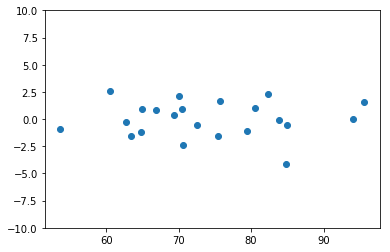

In [6]:
plt.scatter(lm.predict(X), residual)
plt.ylim([-10,10])

#### Now regress the cube root of mass against these diameters. Plot the residual against the fitted values in both these cube root coordinates and in the original coordinates.

In [7]:
newY = (y ** (1./3.))
newX = X

In [8]:
newY.head()

0    4.254321
1    4.405434
2    3.979057
3    4.317828
4    4.299874
Name: Mass, dtype: float64

In [10]:
lm2 = LinearRegression()
lm2.fit(newX, newY)
resCubeRoot = lm2.predict(newX) - newY
resCubeRoot.head()

0   -0.026243
1   -0.007233
2   -0.004892
3   -0.026709
4    0.015893
Name: Mass, dtype: float64

#### From Piazza: https://piazza.com/class/jchzguhsowz6n9?cid=892

* Transform the original data into the cube root space
* Learn a regression in this transformed space
* Make predictions for all points in your data. These points have the units of kg^(1/3)

(-5, 5)

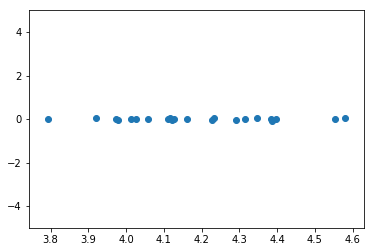

In [12]:
#plot for after step 3 "make predictions for all points in your data. These points have the units of kg^(1/3)
plt.scatter(lm2.predict(newX), resCubeRoot)
plt.ylim([-5,5])

In [13]:
residualCube = lm2.predict(newX)**3 - (newY)**3
residualCube.head()

0   -1.416141
1   -0.420432
2   -0.232065
3   -1.484633
4    0.884790
Name: Mass, dtype: float64

#### From Piazza: https://piazza.com/class/jchzguhsowz6n9?cid=892

* Transform these predictions back into the original space by cubing them (now they have the units of kg)
* Compute the residuals between the true values and these predicted values, both of which are now in kg.

(-10, 10)

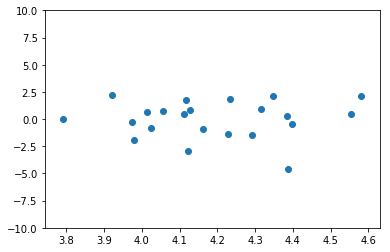

In [24]:
#plot for after step 5 "Compute the residuals between the true values and these predicted values, both of which are now in kg"
plt.scatter(lm2.predict(newX), residualCube)
plt.ylim([-10,10])

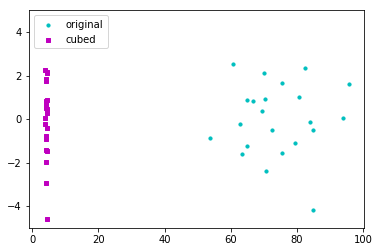

In [22]:
#A comparison chart for both residual against original predictions and cubed residual against predictions of original data
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(lm.predict(X), residual, s=10, c='c', marker="o", label='original')
ax1.scatter(lm2.predict(X), residualCube, s=10, c='m', marker="s", label='cubed')
plt.legend(loc='upper left')
plt.ylim([-5,5])
plt.show()

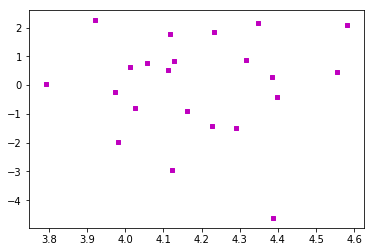

In [23]:
plt.scatter(lm2.predict(X), residualCube, s=10, c='m', marker="s", label='cubed')